# Feature Extraction and Image Processing
Mark S. Nixon & Alberto S. Aguado http://www.southampton.ac.uk/~msn/book/
### Chapter 6: *HoughTransformCircles*
Circle detection by the Hough transform
***  

### Setup modules

In [1]:
import os
import sys
sys.path.append(os.path.join(os.path.dirname("__file__"), "../../Modules"))

# Module functions
from ImageUtilities import imageReadL, createImageF, plotImageF, plotImageL, createScaleImageL
from ImageOperatorsUtilities import applyCannyEdgeDetector
from ImagePropertiesUtilities import imageArgMax, peakDetectorImageL
from PlotUtilities import plot3DHistogram 

# Math and iteration
from math import pi, sin, cos
from timeit import itertools

### Parameters:
    pathToDir = Input image directory
    imageName = Input image name
    gaussianKernelSize = Gaussian kernel size. Filter noise
    sobelKernelSize = Sobel kernel size. Edge detection
    upperT = Upper threshold
    lowerT = Lower threshold
    peakDetection = Percentage of the maximum peak value that is considered for threshold
    radiousRange = Integer range of possible circle radious

In [2]:
pathToDir = os.path.join(os.path.dirname("__file__"), "../../Images/Chapter6/Input/")
imageName = "EyeClose.png"
gaussianKernelSize = 9
sobelKernelSize = 3
upperT = 0.45
lowerT = 0.2
peakDetection = 0.95
radiousRange = [50,70]

### Read and show input image

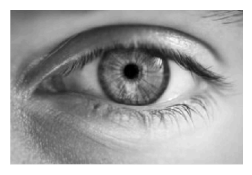

In [3]:
inputImage, width, height  = imageReadL(pathToDir + imageName)
plotImageL(inputImage, figureSize = 3)

### Compute and show edges

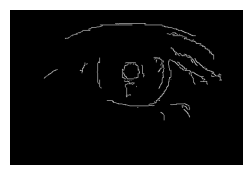

In [4]:
magnitude, angle = applyCannyEdgeDetector(inputImage, gaussianKernelSize, sobelKernelSize, upperT, lowerT)
plotImageF(magnitude, figureSize = 3)

### Gather evidence

In [5]:
# Accumulator 
radiousSize =  radiousRange[1] - radiousRange[0]
accumulator = createImageF(width, height, radiousSize)
 
for x,y in itertools.product(range(0, width), range(0, height)):
    if magnitude[y,x] != 0:
        for r in range(0, radiousSize):
            radious = radiousRange[0] + r
            for m in range(0,360):
                angle = (m * pi) / 180.0
                
                x0, y0 = x-radious * cos(angle), y-radious * sin(angle);
                x0Int, y0Int = int(x0), int(y0)
                
                if x0Int>0 and x0Int<width-1 and y0Int>0 and y0Int<height-1:
                    weightX, weightY = (x0 - x0Int), (y0 - y0Int)
                    accumulator[y0Int,x0Int,r] += (1.0-weightX) + (1.0-weightY)
                    accumulator[y0Int+1,x0Int,r] += weightX + (1.0-weightY)
                    accumulator[y0Int,x0Int+1,r] += (1.0-weightX) + weightY
                    accumulator[y0Int+1,x0Int+1,r] += weightX + weightY 

### Find maximum

In [6]:
maximumPos = imageArgMax(accumulator)
maximum = accumulator[maximumPos[0],maximumPos[1],maximumPos[2]]
peakThreshold = peakDetection * maximum

### Plot a slide of the accumulator

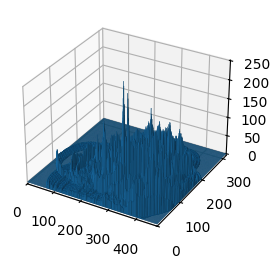

In [7]:
plot3DHistogram(accumulator[:,:,maximumPos[2]])

### Draw circle on output image

In [8]:
# Prepare output image as a dark version of the input
outputImage = createScaleImageL(inputImage, 0.5)

for x,y in itertools.product(range(0, width), range(0, height)):
    for r in range(0,radiousSize):
        radious = radiousRange[0] + r
        if accumulator[y,x,r] > peakThreshold:
            strength = int(255.0 * accumulator[y, x, r] / maximum)
            for m in range(0,360):
                angle = (m * pi) / 180.0
                x0 = int(x-radious * cos(angle));
                y0 = int(y-radious * sin(angle));
                if x0<width and x0>0 and y0<height and y0>0:
                    outputImage[y0,x0] = strength

### Show image with detected circle

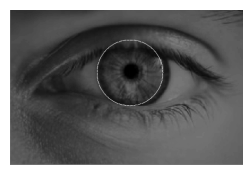

In [10]:
plotImageL(outputImage, figureSize = 3)